In [1]:
import pandas as pd
import numpy as np
import random
import string
from decimal import Decimal , ROUND_HALF_UP

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
df=pd.read_csv('E2_Initial.csv')
df=df.drop('Unnamed: 0' , 1)
df

,STD_Months
0,February
1,December
2,November
3,December
4,November
5,November
6,November
7,December
8,November
9,November


February    40
December    40
November    40
Name: STD_Months, dtype: int64


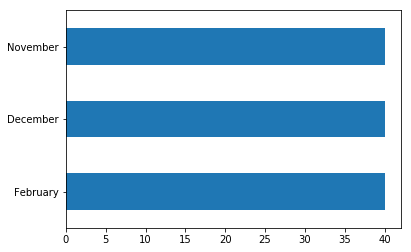

In [3]:
Values = df['STD_Months'].value_counts()
print(Values)
Values.plot.barh()
plt.show()

In [4]:
#Creating 10% to 100% noise
p = [.1 , .2 , .3 , .4 , .5 , 0.6 , 0.7]

for pi in p:    
    #Extract the column's indices [0,1,...,99]
    df[str(pi)+'_TypoB'] = ''
    ix = [(row) for row in range(df['STD_Months'].shape[0])]
    
    for row in ix:
        print("row:" ,row)
        indxs = [i for i , _ in enumerate(df['STD_Months'].iat[row])]
        month = df['STD_Months'].iat[row]
        print(month)
        print ('Index:',indxs)
        length = len(indxs)
        print('length:' , length)
        
        #Coputing the no of letters to cut , considering the length of month
        letters = Decimal(str(length*pi)).quantize(Decimal("1"), rounding=ROUND_HALF_UP)
        print('letters to cut:' , letters)
        
        if letters>0:
            #Selecting random positions for cutting the letters
            positions = random.sample(range(length) , int(letters))
            print('selected positions:' , positions)
            
            for ind in positions:
                """ Replacing chosen letters with '-' """
                month = month[:ind] + "-" + month[ind+1:]
            #Cutting chosen letters                     
            month = month.replace("-" , "")    
            df[str(pi)+'_TypoB'].iat[row] = month
            print('Result:' , month)
            print('\n')
            
        else:
            print('No change!')
            df[str(pi)+'_TypoB'].iat[row] = df['STD_Months'].iat[row]
            print('\n')

row: 0
February
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [0]
Result: ebruary


row: 1
December
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [4]
Result: Deceber


row: 2
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [1]
Result: Nvember


row: 3
December
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [4]
Result: Deceber


row: 4
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [7]
Result: Novembe


row: 5
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [7]
Result: Novembe


row: 6
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [6]
Result: Novembr


row: 7
December
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to cut: 1
selected positions: [5]
Result: Decemer


row: 8
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 

In [5]:
df.to_csv('E2_B_NoisySet')